# Exploratory Data Analysis of Titanic dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = sns.load_dataset("titanic")
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Missing Data

In [7]:
train.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

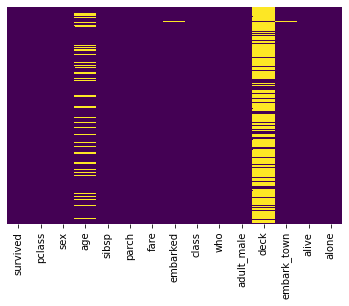

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='survived', ylabel='count'>

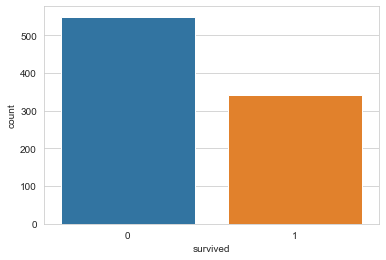

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=train)

<AxesSubplot:xlabel='survived', ylabel='count'>

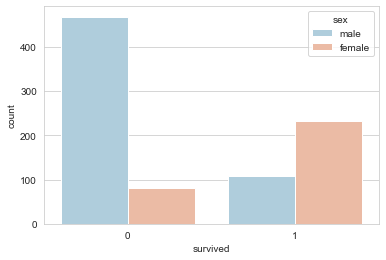

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='survived', ylabel='count'>

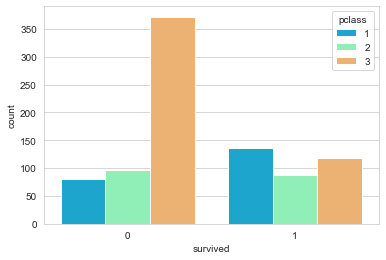

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=train,palette='rainbow')

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

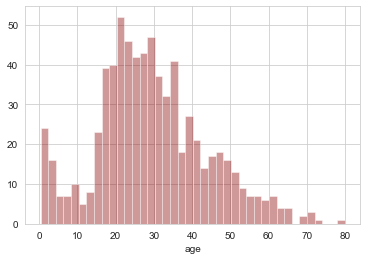

In [17]:
sns.distplot(train['age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

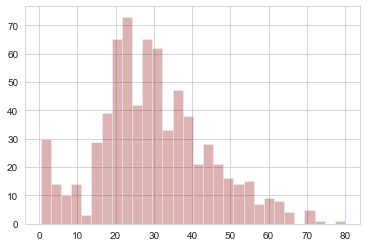

In [19]:
train['age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

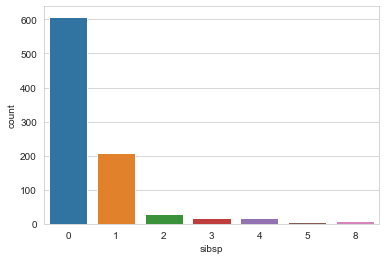

In [22]:
sns.countplot(x='sibsp',data=train)

<AxesSubplot:>

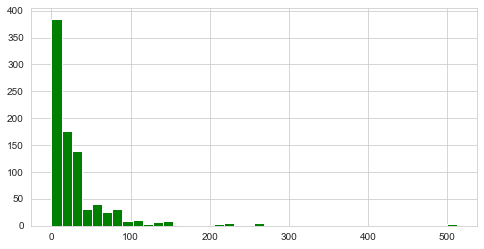

In [24]:
train['fare'].hist(color='green',bins=40,figsize=(8,4))

# Data Cleaning

<AxesSubplot:xlabel='pclass', ylabel='age'>

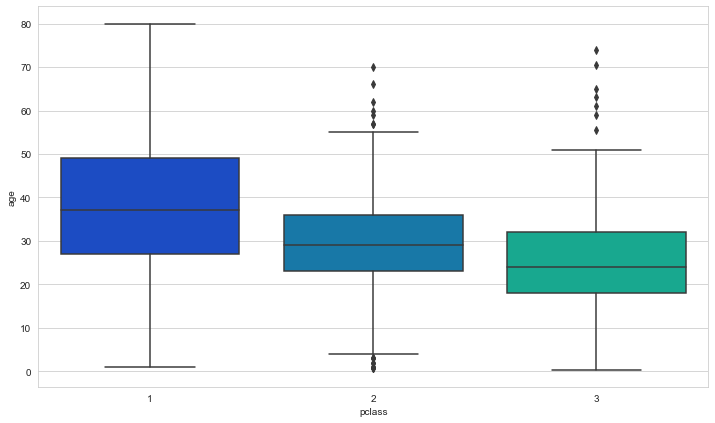

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=train,palette='winter')

In [27]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [29]:
train['age'] = train[['age','pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

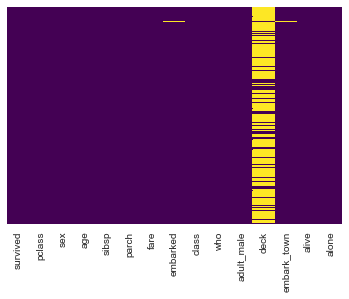

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
train.drop('cabin',axis=1,inplace=True)

KeyError: "['cabin'] not found in axis"